## Data Analysis

### Eigen-shapes
Loads and converts radial measurement data from segmentation into PCA based on reference data set


In [1]:
from tools.wormParam import *
from tools.imgCalibration import *
from tools.shapeAnalysis import *
from tools.waveletFunct import *
import numpy as np
import skvideo.io
import os
import matplotlib.pyplot as plt

In [2]:
#Load all testFiles in folder
folder='pickles/testSet/'
reference='tools/REFERENCE/' #REFERENCE PCA TRANSFORMATIONS

'''
X: the PCA data
light: status of the stimulus
t_on: time the stimulus has been on at each frame
t_off: time stimulus has been off at each frame
wormNumber: the worm ID of each element in the array
COM: x,y position
expVar: explained variance of PCA loadings
eig_val: eigenvalues of PCA
eig_vector: eigenvectors of PCA (the "eigen-shapes")
'''
X,light,t_on,t_off,wormNumber,COM,expVar,eig_val,eig_vector=loadAndReferencePCA_refScale(folder,reference,
                                                                                         scale=True,verbose=True,ncoord=10,tp=1,smooth=20,com=True)


areg0.pickle
<class 'list'> <class 'tuple'>


**Plot one worm of data for demonstration**

Text(0, 0.5, 'Position (pixels)')

/home/sam/anaconda3/envs/imgBehavior/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


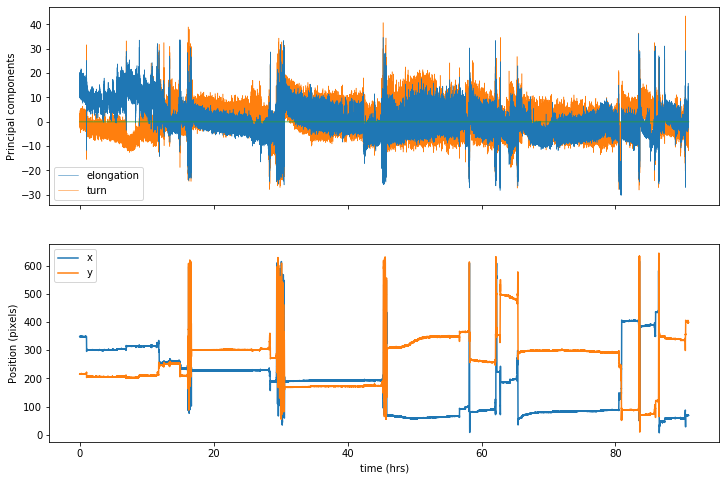

In [3]:
k=0
fig, ax = plt.subplots(nrows=2,sharex=True,figsize=(12,8))
ind=np.where(wormNumber==k)[0]
t_all=np.linspace(0,ind.size/2/60/60,ind.size)
ax[0].plot(t_all,(X[ind,0]),label='elongation',lw=.5,zorder=-2)
ax[0].plot(t_all,(X[ind,1]),label='turn',lw=.5,zorder=-6)
ax[0].legend()
#plot com info
ax[1].plot(t_all,COM[ind,0],label='x')
ax[1].plot(t_all,COM[ind,1],label='y')

#light and details
ax[0].plot(t_all,light[ind]*20,label='light', alpha=.5,zorder=-1)

#plt.ylim(-7,30)
plt.legend(loc=2)
plt.xlabel('time (hrs)')

ax[0].set_ylabel('Principal components')
ax[1].set_ylabel('Position (pixels)')

## Activity calculation

Load the activity labeling object.  Details provided in the class definition file.  Use this for one-line transformation from PCA to Activity

In [4]:
from activityLabeling_LDS import activityClassifier_LDS
import pickle

#load the classifier object
with open('tools/fitActivityClassifier.pickle', 'rb') as f:
    Activity = pickle.load(f)
# Run the activity calculation
Z = Activity.predict_raw(X)[0] #*note, this function returns the activity and marginal liklihoods.  you probably only care about the first element

#### Plot the results

Text(0, 0.5, 'Position (pixels)')

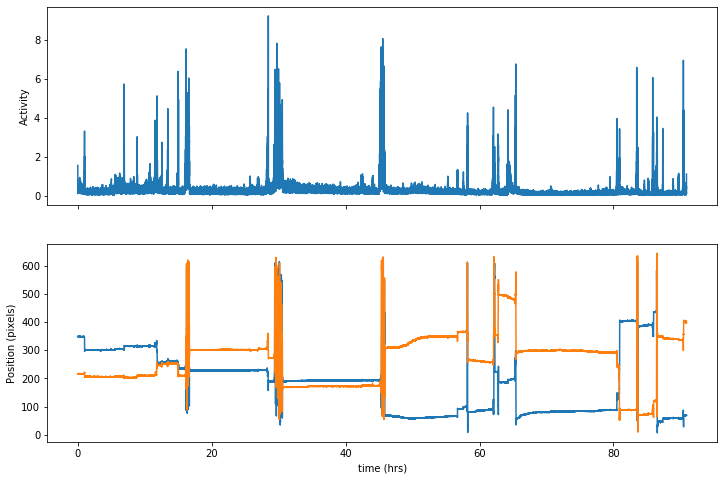

In [5]:
k=0
fig, ax = plt.subplots(nrows=2,sharex=True,figsize=(12,8))
t_all=np.linspace(0,ind.size/2/60/60,ind.size)
#plot activity score
ax[0].plot(t_all,Z[ind])
#plot com info
ax[1].plot(t_all,COM[ind,0],label='x')
ax[1].plot(t_all,COM[ind,1],label='y')

plt.xlabel('time (hrs)')
ax[0].set_ylabel('Activity')
ax[1].set_ylabel('Position (pixels)')